# `neural_network_without_race_without_weather_fake_data.ipynb`

### Author: Anthony Hein

#### Last updated: 12/4/2021

# Overview:

Feed in a neural network fake data to see how its predictions may change.

---

## Setup

In [1]:
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `X_train_preprocess_without_race.csv`

In [3]:
X_train = pd.read_csv(f"{BASE_DIR}/data/analysis/X_train_preprocess_without_race.csv", low_memory=False)
X_train.head()

,horse1_age,horse1_saddle,horse1_decimalPrice,horse1_isFav,horse1_outHandicap,horse1_RPR,horse1_weight,horse1_jockey_d_last_race,horse1_jockey_d_first_race,horse1_jockey_prev_1_position,...,horse2_jockey_prev_3_position_rain,horse2_jockey_prev_1_finishing_time_ratio_rain,horse2_jockey_prev_2_finishing_time_ratio_rain,horse2_jockey_prev_3_finishing_time_ratio_rain,horse2_jockey_prev_1_position_rhum,horse2_jockey_prev_2_position_rhum,horse2_jockey_prev_3_position_rhum,horse2_jockey_prev_1_finishing_time_ratio_rhum,horse2_jockey_prev_2_finishing_time_ratio_rhum,horse2_jockey_prev_3_finishing_time_ratio_rhum
0,0.200000,0.230769,0.196970,0.0,0.0,0.73125,0.692308,0.007631,0.236544,0.100,...,0.050,0.805104,0.780139,0.783438,0.100,0.025,0.025,0.805104,0.799642,0.780139
1,0.400000,0.038462,0.072222,0.0,0.0,0.73125,0.743590,0.005050,0.236544,0.100,...,0.100,0.801416,0.781238,0.794160,0.075,0.050,0.075,0.801416,0.800487,0.785703
2,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.100,0.799909,0.780139,0.786816,0.025,0.100,0.025,0.799642,0.806486,0.780139
3,0.133333,0.423077,0.098485,0.0,0.0,0.65000,0.705128,0.000740,0.237283,0.025,...,0.075,0.800176,0.781623,0.781870,0.050,0.075,0.050,0.801163,0.801416,0.780963
4,0.133333,0.192308,0.090278,0.0,0.0,0.66250,0.730769,0.000740,0.234655,0.050,...,0.100,0.799642,0.783601,0.785468,0.125,0.100,0.025,0.803191,0.805104,0.780139


In [4]:
X_train.shape

(800666, 144)

In [5]:
drop_cols = [
    'horse1_jockey_prev_1_position_temp',
    'horse1_jockey_prev_2_position_temp',
    'horse1_jockey_prev_3_position_temp',
    'horse1_jockey_prev_1_finishing_time_ratio_temp',
    'horse1_jockey_prev_2_finishing_time_ratio_temp',
    'horse1_jockey_prev_3_finishing_time_ratio_temp',
    'horse1_jockey_prev_1_position_msl',
    'horse1_jockey_prev_2_position_msl',
    'horse1_jockey_prev_3_position_msl',
    'horse1_jockey_prev_1_finishing_time_ratio_msl',
    'horse1_jockey_prev_2_finishing_time_ratio_msl',
    'horse1_jockey_prev_3_finishing_time_ratio_msl',
    'horse1_jockey_prev_1_position_rain',
    'horse1_jockey_prev_2_position_rain',
    'horse1_jockey_prev_3_position_rain',
    'horse1_jockey_prev_1_finishing_time_ratio_rain',
    'horse1_jockey_prev_2_finishing_time_ratio_rain',
    'horse1_jockey_prev_3_finishing_time_ratio_rain',
    'horse1_jockey_prev_1_position_rhum',
    'horse1_jockey_prev_2_position_rhum',
    'horse1_jockey_prev_3_position_rhum',
    'horse1_jockey_prev_1_finishing_time_ratio_rhum',
    'horse1_jockey_prev_2_finishing_time_ratio_rhum',
    'horse1_jockey_prev_3_finishing_time_ratio_rhum',
    'horse2_jockey_prev_1_position_temp',
    'horse2_jockey_prev_2_position_temp',
    'horse2_jockey_prev_3_position_temp',
    'horse2_jockey_prev_1_finishing_time_ratio_temp',
    'horse2_jockey_prev_2_finishing_time_ratio_temp',
    'horse2_jockey_prev_3_finishing_time_ratio_temp',
    'horse2_jockey_prev_1_position_msl',
    'horse2_jockey_prev_2_position_msl',
    'horse2_jockey_prev_3_position_msl',
    'horse2_jockey_prev_1_finishing_time_ratio_msl',
    'horse2_jockey_prev_2_finishing_time_ratio_msl',
    'horse2_jockey_prev_3_finishing_time_ratio_msl',
    'horse2_jockey_prev_1_position_rain',
    'horse2_jockey_prev_2_position_rain',
    'horse2_jockey_prev_3_position_rain',
    'horse2_jockey_prev_1_finishing_time_ratio_rain',
    'horse2_jockey_prev_2_finishing_time_ratio_rain',
    'horse2_jockey_prev_3_finishing_time_ratio_rain',
    'horse2_jockey_prev_1_position_rhum',
    'horse2_jockey_prev_2_position_rhum',
    'horse2_jockey_prev_3_position_rhum',
    'horse2_jockey_prev_1_finishing_time_ratio_rhum',
    'horse2_jockey_prev_2_finishing_time_ratio_rhum',
    'horse2_jockey_prev_3_finishing_time_ratio_rhum'
]

In [6]:
X_train = X_train.drop(columns=drop_cols)
X_train.shape

(800666, 96)

---

## Load Neural Network

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Set the device to use
# CUDA refers to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Fixing Random Seed for Reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [8]:
class Net(nn.Module):
    def __init__(self, input_size, num_layers, layers_size):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, layers_size)])
        self.hidden_layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, num_layers-1)])
        self.output = nn.Linear(layers_size, 1)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        z = x
        for layer in self.hidden_layers:
            z = self.activation(layer(z))
        return self.output(z)

In [9]:
net = Net(X_train.shape[1], 1, 500)
net.load_state_dict(torch.load(f"{BASE_DIR}/data/analysis/neural_network/net_no_weather_500_nodes.bin"))
net.eval()

Net(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=96, out_features=500, bias=True)
  )
  (output): Linear(in_features=500, out_features=1, bias=True)
  (activation): ReLU()
)

---

## Sample Data

In [10]:
X_train_sample = X_train.sample(frac=0.1)
X_train_sample.shape

(80067, 96)

---

## Create Dataframe where Each Input Has Equal Features

In [11]:
X_train_sample_eq = X_train_sample.copy()
X_train_sample_eq.shape

(80067, 96)

In [12]:
for column in X_train_sample_eq.columns:
    
    suffix = column[7:]
    copy_column = "horse1_" + suffix
    
    X_train_sample_eq[column] = X_train_sample_eq[copy_column]

---

## Predict on Equal-Feature Dataframe

In [13]:
X_train_sample_eq_tensor = torch.from_numpy(X_train_sample_eq.to_numpy()).float().to(device)

In [14]:
with torch.no_grad():
    eq_preds = torch.sigmoid(net.forward(X_train_sample_eq_tensor))

In [15]:
eq_preds.numpy()

array([[0.6235171 ],
       [0.6717581 ],
       [0.62450665],
       ...,
       [0.5903801 ],
       [0.6097878 ],
       [0.71033806]], dtype=float32)

In [16]:
torch.mean(eq_preds)

tensor(0.5917)

(array([3.0000e+00, 2.0000e+01, 1.9500e+02, 1.3390e+03, 1.4921e+04,
        4.2885e+04, 1.9142e+04, 1.4930e+03, 6.0000e+01, 9.0000e+00]),
 array([0.11079857, 0.19736423, 0.28392985, 0.3704955 , 0.45706117,
        0.5436268 , 0.63019246, 0.7167581 , 0.80332375, 0.88988936,
        0.97645503], dtype=float32),
 <BarContainer object of 10 artists>)

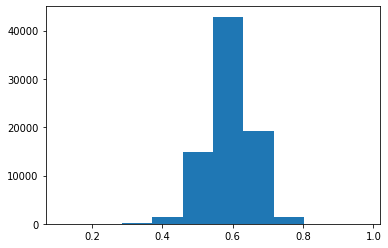

In [17]:
plt.hist(eq_preds.numpy())

---

## Create Dataframe with Exaggerated Differences Feature-Wise

In [18]:
list(X_train.columns)

['horse1_age',
 'horse1_saddle',
 'horse1_decimalPrice',
 'horse1_isFav',
 'horse1_outHandicap',
 'horse1_RPR',
 'horse1_weight',
 'horse1_jockey_d_last_race',
 'horse1_jockey_d_first_race',
 'horse1_jockey_prev_1_position',
 'horse1_jockey_prev_2_position',
 'horse1_jockey_prev_3_position',
 'horse1_jockey_prev_1_finishing_time_ratio',
 'horse1_jockey_prev_2_finishing_time_ratio',
 'horse1_jockey_prev_3_finishing_time_ratio',
 'horse1_jockey_prev_1_global_finishing_time_ratio',
 'horse1_jockey_prev_2_global_finishing_time_ratio',
 'horse1_jockey_prev_3_global_finishing_time_ratio',
 'horse1_jockey_prev_1_position_course',
 'horse1_jockey_prev_2_position_course',
 'horse1_jockey_prev_3_position_course',
 'horse1_jockey_prev_1_finishing_time_ratio_course',
 'horse1_jockey_prev_2_finishing_time_ratio_course',
 'horse1_jockey_prev_3_finishing_time_ratio_course',
 'horse1_jockey_prev_1_position_metric',
 'horse1_jockey_prev_2_position_metric',
 'horse1_jockey_prev_3_position_metric',
 'hor

### Odds & Ratings

(array([37326., 26524.,  9632.,  3000.,  1896.,   657.,   553.,   252.,
          189.,    38.]),
 array([0.00216234, 0.0982424 , 0.19432247, 0.29040253, 0.38648259,
        0.48256265, 0.57864271, 0.67472278, 0.77080284, 0.8668829 ,
        0.96296296]),
 <BarContainer object of 10 artists>)

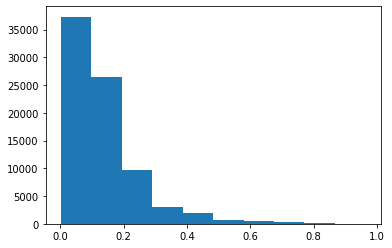

In [19]:
plt.hist(X_train_sample_eq['horse1_decimalPrice'])

(array([2.2310e+03, 5.5880e+03, 1.1680e+04, 1.9519e+04, 2.2014e+04,
        1.2500e+04, 5.5590e+03, 9.0500e+02, 6.8000e+01, 3.0000e+00]),
 array([-0.00625 ,  0.094375,  0.195   ,  0.295625,  0.39625 ,  0.496875,
         0.5975  ,  0.698125,  0.79875 ,  0.899375,  1.      ]),
 <BarContainer object of 10 artists>)

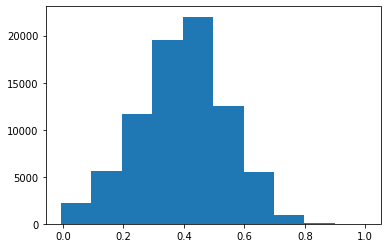

In [20]:
plt.hist(X_train_sample_eq['horse1_RPR'])

#### Small

In [21]:
odds_q_lo = X_train_sample_eq['horse1_decimalPrice'].quantile(q=1/3)
odds_q_lo

0.0722222222222221

In [22]:
odds_q_hi = X_train_sample_eq['horse1_decimalPrice'].quantile(q=2/3)
odds_q_hi

0.1354166666666666

In [23]:
rpr_q_lo = X_train_sample_eq['horse1_RPR'].quantile(q=1/3)
rpr_q_lo

0.3375

In [24]:
rpr_q_hi = X_train_sample_eq['horse1_RPR'].quantile(q=2/3)
rpr_q_hi

0.4625

In [25]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [26]:
X_train_sample_exagg["horse1_decimalPrice"] = odds_q_hi
X_train_sample_exagg["horse2_decimalPrice"] = odds_q_lo
X_train_sample_exagg["horse1_RPR"] = rpr_q_hi
X_train_sample_exagg["horse2_RPR"] = rpr_q_lo

In [27]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [28]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [29]:
sample_exagg_preds.numpy()

array([[0.9999957 ],
       [0.9999962 ],
       [0.9998566 ],
       ...,
       [0.99976736],
       [0.99972695],
       [0.99991596]], dtype=float32)

In [30]:
torch.mean(sample_exagg_preds)

tensor(0.9999)

(array([1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 3.4000e+01, 8.0028e+04]),
 array([0.99115163, 0.9920364 , 0.99292123, 0.993806  , 0.9946908 ,
        0.99557555, 0.9964604 , 0.99734515, 0.9982299 , 0.99911475,
        0.9999995 ], dtype=float32),
 <BarContainer object of 10 artists>)

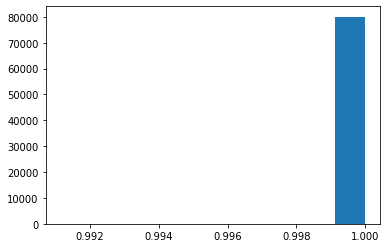

In [31]:
plt.hist(sample_exagg_preds.numpy())

In [32]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.4083)

#### Medium

In [33]:
odds_q_lo = X_train_sample_eq['horse1_decimalPrice'].quantile(q=1/4)
odds_q_lo

0.0637254901960784

In [34]:
odds_q_hi = X_train_sample_eq['horse1_decimalPrice'].quantile(q=3/4)
odds_q_hi

0.1666666666666665

In [35]:
rpr_q_lo = X_train_sample_eq['horse1_RPR'].quantile(q=1/4)
rpr_q_lo

0.3

In [36]:
rpr_q_hi = X_train_sample_eq['horse1_RPR'].quantile(q=3/4)
rpr_q_hi

0.49375

In [37]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [38]:
X_train_sample_exagg["horse1_decimalPrice"] = odds_q_hi
X_train_sample_exagg["horse2_decimalPrice"] = odds_q_lo
X_train_sample_exagg["horse1_RPR"] = rpr_q_hi
X_train_sample_exagg["horse2_RPR"] = rpr_q_lo

In [39]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [40]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [41]:
sample_exagg_preds.numpy()

array([[1.        ],
       [1.        ],
       [0.99999833],
       ...,
       [0.9999963 ],
       [0.9999925 ],
       [0.99999917]], dtype=float32)

In [42]:
torch.mean(sample_exagg_preds)

tensor(1.0000)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 8.0062e+04]),
 array([0.9995586 , 0.9996028 , 0.9996469 , 0.999691  , 0.9997352 ,
        0.99977934, 0.99982345, 0.99986756, 0.9999117 , 0.9999559 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

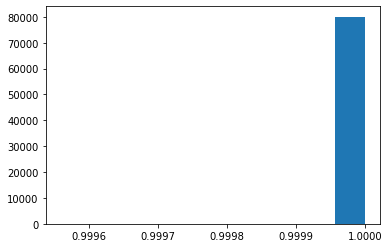

In [43]:
plt.hist(sample_exagg_preds.numpy())

In [44]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.4083)

#### High

In [45]:
odds_q_lo = X_train_sample_eq['horse1_decimalPrice'].quantile(q=1/5)
odds_q_lo

0.0515873015873015

In [46]:
odds_q_hi = X_train_sample_eq['horse1_decimalPrice'].quantile(q=4/5)
odds_q_hi

0.1969696969696969

In [47]:
rpr_q_lo = X_train_sample_eq['horse1_RPR'].quantile(q=1/5)
rpr_q_lo

0.275

In [48]:
rpr_q_hi = X_train_sample_eq['horse1_RPR'].quantile(q=4/5)
rpr_q_hi

0.5125

In [49]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [50]:
X_train_sample_exagg["horse1_decimalPrice"] = odds_q_hi
X_train_sample_exagg["horse2_decimalPrice"] = odds_q_lo
X_train_sample_exagg["horse1_RPR"] = rpr_q_hi
X_train_sample_exagg["horse2_RPR"] = rpr_q_lo

In [51]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [52]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [53]:
sample_exagg_preds.numpy()

array([[1.        ],
       [1.        ],
       [0.9999999 ],
       ...,
       [0.99999976],
       [0.9999993 ],
       [1.        ]], dtype=float32)

In [54]:
torch.mean(sample_exagg_preds)

tensor(1.)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 7.0000e+00, 8.0057e+04]),
 array([0.9999572, 0.9999615, 0.9999658, 0.99997  , 0.9999743, 0.9999786,
        0.9999829, 0.9999872, 0.9999914, 0.9999957, 1.       ],
       dtype=float32),
 <BarContainer object of 10 artists>)

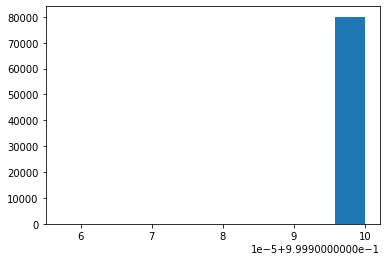

In [55]:
plt.hist(sample_exagg_preds.numpy())

In [56]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.4083)

### Unconditioned Previous Races

In [57]:
columns_horse1 = [
    'horse1_jockey_prev_1_position',
    'horse1_jockey_prev_2_position',
    'horse1_jockey_prev_3_position',
    'horse1_jockey_prev_1_finishing_time_ratio',
    'horse1_jockey_prev_2_finishing_time_ratio',
    'horse1_jockey_prev_3_finishing_time_ratio',
    'horse1_jockey_prev_1_global_finishing_time_ratio',
    'horse1_jockey_prev_2_global_finishing_time_ratio',
    'horse1_jockey_prev_3_global_finishing_time_ratio',
]

In [58]:
columns_horse2 = [
    'horse2_jockey_prev_1_position',
    'horse2_jockey_prev_2_position',
    'horse2_jockey_prev_3_position',
    'horse2_jockey_prev_1_finishing_time_ratio',
    'horse2_jockey_prev_2_finishing_time_ratio',
    'horse2_jockey_prev_3_finishing_time_ratio',
    'horse2_jockey_prev_1_global_finishing_time_ratio',
    'horse2_jockey_prev_2_global_finishing_time_ratio',
    'horse2_jockey_prev_3_global_finishing_time_ratio',
]

#### Small

In [59]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [60]:
q_los

[0.1,
 0.1,
 0.1,
 0.7846141171896565,
 0.8042290520687826,
 0.8042070714605399,
 0.5503412097814897,
 0.5400278228623064,
 0.5508194999044199]

In [61]:
q_his

[0.175,
 0.175,
 0.175,
 0.7930532104830617,
 0.8129486096918469,
 0.8129486096918469,
 0.5783369794540149,
 0.5681089935340039,
 0.5798535642680549]

In [62]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [63]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [64]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [65]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [66]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [67]:
sample_exagg_preds.numpy()

array([[0.6411756 ],
       [0.6939405 ],
       [0.62881833],
       ...,
       [0.60583776],
       [0.616693  ],
       [0.698211  ]], dtype=float32)

In [68]:
torch.mean(sample_exagg_preds)

tensor(0.6001)

(array([2.0000e+00, 1.4000e+01, 1.2900e+02, 1.1850e+03, 1.4763e+04,
        4.3321e+04, 1.9251e+04, 1.3330e+03, 6.0000e+01, 9.0000e+00]),
 array([0.12410411, 0.20970751, 0.2953109 , 0.38091433, 0.46651772,
        0.5521211 , 0.6377245 , 0.72332793, 0.80893135, 0.8945347 ,
        0.9801381 ], dtype=float32),
 <BarContainer object of 10 artists>)

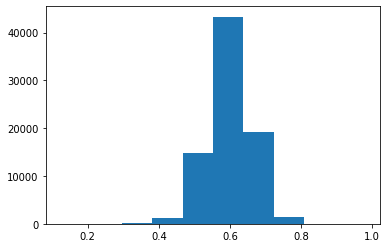

In [69]:
plt.hist(sample_exagg_preds.numpy())

In [70]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0139)

#### Medium

In [71]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [72]:
q_los

[0.075,
 0.075,
 0.075,
 0.7829666902316295,
 0.8025404403145713,
 0.8025404403145713,
 0.5445689914674867,
 0.534443696377344,
 0.54510870864489]

In [73]:
q_his

[0.2,
 0.2,
 0.2,
 0.7964694140641242,
 0.8165498035705404,
 0.8166393128202973,
 0.5895933502852463,
 0.5790988472987025,
 0.5910519907743996]

In [74]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [75]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [76]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [77]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [78]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [79]:
sample_exagg_preds.numpy()

array([[0.6478317 ],
       [0.69837683],
       [0.6327265 ],
       ...,
       [0.60983765],
       [0.6206514 ],
       [0.6999388 ]], dtype=float32)

In [80]:
torch.mean(sample_exagg_preds)

tensor(0.6050)

(array([2.0000e+00, 1.1000e+01, 1.2700e+02, 1.0390e+03, 1.3525e+04,
        4.2543e+04, 2.1208e+04, 1.5300e+03, 7.3000e+01, 9.0000e+00]),
 array([0.12523511, 0.21076855, 0.296302  , 0.38183543, 0.46736887,
        0.5529023 , 0.6384357 , 0.72396916, 0.8095026 , 0.89503604,
        0.9805695 ], dtype=float32),
 <BarContainer object of 10 artists>)

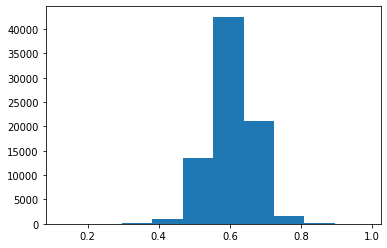

In [81]:
plt.hist(sample_exagg_preds.numpy())

In [82]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0166)

#### High

In [83]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [84]:
q_los

[0.05,
 0.05,
 0.05,
 0.782023198885685,
 0.8015733621876803,
 0.8015432964524856,
 0.5410542997215436,
 0.5309146448845048,
 0.5415883794118409]

In [85]:
q_his

[0.225,
 0.225,
 0.225,
 0.7992265147419632,
 0.8194143014553776,
 0.8194241384454721,
 0.5985009864135731,
 0.5878763770258646,
 0.6002295110108569]

In [86]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [87]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [88]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [89]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [90]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [91]:
sample_exagg_preds.numpy()

array([[0.654462  ],
       [0.70258623],
       [0.63666975],
       ...,
       [0.6138768 ],
       [0.62464744],
       [0.7013843 ]], dtype=float32)

In [92]:
torch.mean(sample_exagg_preds)

tensor(0.6097)

(array([2.0000e+00, 1.1000e+01, 1.1600e+02, 9.4300e+02, 1.2453e+04,
        4.1429e+04, 2.3274e+04, 1.7500e+03, 8.0000e+01, 9.0000e+00]),
 array([0.12627348, 0.21174595, 0.2972184 , 0.38269088, 0.46816334,
        0.5536358 , 0.63910824, 0.7245807 , 0.81005317, 0.89552563,
        0.9809981 ], dtype=float32),
 <BarContainer object of 10 artists>)

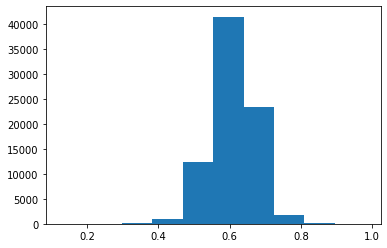

In [93]:
plt.hist(sample_exagg_preds.numpy())

In [94]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0201)

### Coures Races

In [95]:
columns_horse1 = [
    'horse1_jockey_prev_1_position_course',
    'horse1_jockey_prev_2_position_course',
    'horse1_jockey_prev_3_position_course',
    'horse1_jockey_prev_1_finishing_time_ratio_course',
    'horse1_jockey_prev_2_finishing_time_ratio_course',
    'horse1_jockey_prev_3_finishing_time_ratio_course',
]

In [96]:
columns_horse2 = [
    'horse2_jockey_prev_1_position_course',
    'horse2_jockey_prev_2_position_course',
    'horse2_jockey_prev_3_position_course',
    'horse2_jockey_prev_1_finishing_time_ratio_course',
    'horse2_jockey_prev_2_finishing_time_ratio_course',
    'horse2_jockey_prev_3_finishing_time_ratio_course',
]

#### Small

In [97]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [98]:
q_los

[0.1, 0.1, 0.1, 0.7845904579745484, 0.7845817418561325, 0.7845352574964265]

In [99]:
q_his

[0.175,
 0.175,
 0.175,
 0.7928639747161806,
 0.7929228871238266,
 0.7928639747161806]

In [100]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [101]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [102]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [103]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [104]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [105]:
sample_exagg_preds.numpy()

array([[0.65098184],
       [0.6628783 ],
       [0.6278375 ],
       ...,
       [0.5948796 ],
       [0.621295  ],
       [0.6818941 ]], dtype=float32)

In [106]:
torch.mean(sample_exagg_preds)

tensor(0.5931)

(array([2.0000e+00, 1.0000e+01, 7.8000e+01, 9.1900e+02, 1.3325e+04,
        4.4090e+04, 2.0307e+04, 1.2630e+03, 6.4000e+01, 9.0000e+00]),
 array([0.107139  , 0.19396505, 0.28079107, 0.36761713, 0.4544432 ,
        0.54126924, 0.62809527, 0.7149213 , 0.8017473 , 0.8885734 ,
        0.97539943], dtype=float32),
 <BarContainer object of 10 artists>)

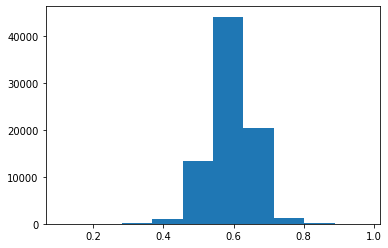

In [107]:
plt.hist(sample_exagg_preds.numpy())

In [108]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0147)

#### Medium

In [109]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [110]:
q_los

[0.075,
 0.075,
 0.075,
 0.7829666902316295,
 0.7829666902316295,
 0.7829666902316295]

In [111]:
q_his

[0.2, 0.2, 0.2, 0.7963504826069203, 0.7963987191749489, 0.7963987191749489]

In [112]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [113]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [114]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [115]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [116]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [117]:
sample_exagg_preds.numpy()

array([[0.6515605 ],
       [0.6594935 ],
       [0.6273015 ],
       ...,
       [0.5943267 ],
       [0.6207556 ],
       [0.67329746]], dtype=float32)

In [118]:
torch.mean(sample_exagg_preds)

tensor(0.5919)

(array([2.0000e+00, 9.0000e+00, 7.6000e+01, 9.3600e+02, 1.3729e+04,
        4.3244e+04, 2.0804e+04, 1.1890e+03, 6.9000e+01, 9.0000e+00]),
 array([0.10484494, 0.19192731, 0.2790097 , 0.3660921 , 0.45317447,
        0.54025686, 0.62733924, 0.71442163, 0.801504  , 0.8885864 ,
        0.9756688 ], dtype=float32),
 <BarContainer object of 10 artists>)

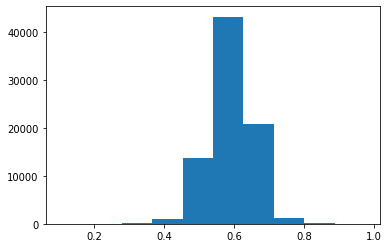

In [119]:
plt.hist(sample_exagg_preds.numpy())

In [120]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0176)

#### High

In [121]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [122]:
q_los

[0.05, 0.05, 0.05, 0.782023198885685, 0.7819935590132026, 0.7819938664458573]

In [123]:
q_his

[0.225,
 0.225,
 0.225,
 0.7989938674839251,
 0.7991086899266711,
 0.7990491055143748]

In [124]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [125]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [126]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [127]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [128]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [129]:
sample_exagg_preds.numpy()

array([[0.6523858 ],
       [0.65628743],
       [0.62682104],
       ...,
       [0.5938313 ],
       [0.6202721 ],
       [0.6645761 ]], dtype=float32)

In [130]:
torch.mean(sample_exagg_preds)

tensor(0.5909)

(array([2.0000e+00, 9.0000e+00, 7.3000e+01, 9.9800e+02, 1.4353e+04,
        4.1906e+04, 2.1478e+04, 1.1650e+03, 7.4000e+01, 9.0000e+00]),
 array([0.10265211, 0.19000648, 0.27736083, 0.3647152 , 0.45206958,
        0.53942394, 0.6267783 , 0.71413267, 0.801487  , 0.8888414 ,
        0.97619575], dtype=float32),
 <BarContainer object of 10 artists>)

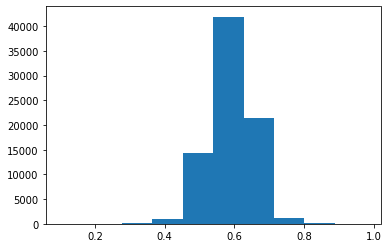

In [131]:
plt.hist(sample_exagg_preds.numpy())

In [132]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0210)

### Metric Races

In [133]:
columns_horse1 = [
    'horse1_jockey_prev_1_position_metric',
    'horse1_jockey_prev_2_position_month',
    'horse1_jockey_prev_3_position_metric',
    'horse1_jockey_prev_1_finishing_time_ratio_metric',
    'horse1_jockey_prev_2_finishing_time_ratio_metric',
    'horse1_jockey_prev_3_finishing_time_ratio_metric',
]

In [134]:
columns_horse2 = [
    'horse2_jockey_prev_1_position_metric',
    'horse2_jockey_prev_2_position_month',
    'horse2_jockey_prev_3_position_metric',
    'horse2_jockey_prev_1_finishing_time_ratio_metric',
    'horse2_jockey_prev_2_finishing_time_ratio_metric',
    'horse2_jockey_prev_3_finishing_time_ratio_metric',
]

#### Small

In [135]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [136]:
q_los

[0.1, 0.1, 0.1, 0.7846141171896565, 0.7845904579745486, 0.7845926726826628]

In [137]:
q_his

[0.175,
 0.175,
 0.175,
 0.7930053644945313,
 0.7930532104830617,
 0.7930053644945313]

In [138]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [139]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [140]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [141]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [142]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [143]:
sample_exagg_preds.numpy()

array([[0.6208318 ],
       [0.6813348 ],
       [0.644516  ],
       ...,
       [0.58719903],
       [0.5995963 ],
       [0.70626277]], dtype=float32)

In [144]:
torch.mean(sample_exagg_preds)

tensor(0.5999)

(array([3.0000e+00, 2.9000e+01, 2.1500e+02, 1.1660e+03, 1.3095e+04,
        4.0936e+04, 2.2570e+04, 1.9730e+03, 7.1000e+01, 9.0000e+00]),
 array([0.11242643, 0.19894415, 0.28546187, 0.3719796 , 0.45849732,
        0.54501504, 0.6315328 , 0.7180505 , 0.80456823, 0.8910859 ,
        0.9776037 ], dtype=float32),
 <BarContainer object of 10 artists>)

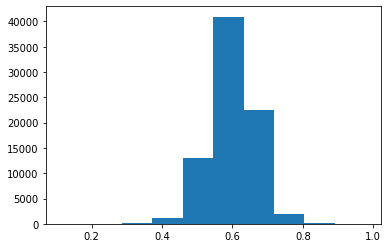

In [145]:
plt.hist(sample_exagg_preds.numpy())

In [146]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0142)

#### Medium

In [147]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [148]:
q_los

[0.075,
 0.075,
 0.075,
 0.7829666902316295,
 0.7829666902316295,
 0.7829666902316295]

In [149]:
q_his

[0.2, 0.2, 0.2, 0.79652108416336, 0.79652108416336, 0.7966343688055333]

In [150]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [151]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [152]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [153]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [154]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [155]:
sample_exagg_preds.numpy()

array([[0.63262945],
       [0.68566906],
       [0.65022475],
       ...,
       [0.59324735],
       [0.6055852 ],
       [0.7051435 ]], dtype=float32)

In [156]:
torch.mean(sample_exagg_preds)

tensor(0.6062)

(array([3.0000e+00, 2.8000e+01, 1.9900e+02, 1.0010e+03, 1.1700e+04,
        3.9211e+04, 2.5541e+04, 2.2930e+03, 8.2000e+01, 9.0000e+00]),
 array([0.11229426, 0.1988993 , 0.28550434, 0.37210938, 0.45871443,
        0.5453195 , 0.6319245 , 0.7185296 , 0.8051346 , 0.89173967,
        0.9783447 ], dtype=float32),
 <BarContainer object of 10 artists>)

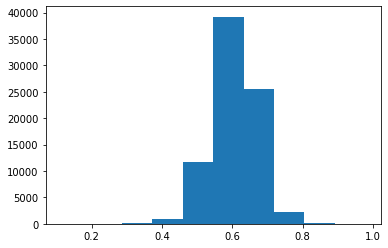

In [157]:
plt.hist(sample_exagg_preds.numpy())

In [158]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0194)

#### High

In [159]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [160]:
q_los

[0.05, 0.05, 0.05, 0.7819938664458573, 0.7819934821550388, 0.782023198885685]

In [161]:
q_his

[0.225,
 0.225,
 0.225,
 0.7992265147419632,
 0.799245307054276,
 0.7995130443798147]

In [162]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [163]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [164]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [165]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [166]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [167]:
sample_exagg_preds.numpy()

array([[0.6443893 ],
       [0.69011   ],
       [0.6559399 ],
       ...,
       [0.5993197 ],
       [0.611594  ],
       [0.70409364]], dtype=float32)

In [168]:
torch.mean(sample_exagg_preds)

tensor(0.6125)

(array([3.0000e+00, 2.6000e+01, 1.8200e+02, 8.9600e+02, 1.0336e+04,
        3.7317e+04, 2.8298e+04, 2.8870e+03, 1.1200e+02, 1.0000e+01]),
 array([0.11218522, 0.19887319, 0.28556114, 0.3722491 , 0.45893705,
        0.54562503, 0.632313  , 0.71900094, 0.8056889 , 0.89237684,
        0.9790648 ], dtype=float32),
 <BarContainer object of 10 artists>)

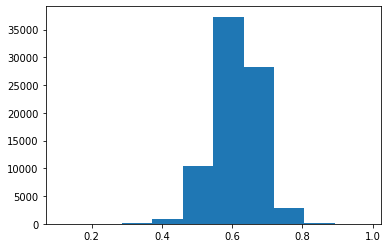

In [169]:
plt.hist(sample_exagg_preds.numpy())

In [170]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0252)

### Track Condition Races

In [171]:
columns_horse1 = [
    'horse1_jockey_prev_1_position_ncond',
    'horse1_jockey_prev_2_position_ncond',
    'horse1_jockey_prev_3_position_ncond',
    'horse1_jockey_prev_1_finishing_time_ratio_ncond',
    'horse1_jockey_prev_2_finishing_time_ratio_ncond',
    'horse1_jockey_prev_3_finishing_time_ratio_ncond',
]

In [172]:
columns_horse2 = [
    'horse2_jockey_prev_1_position_ncond',
    'horse2_jockey_prev_2_position_ncond',
    'horse2_jockey_prev_3_position_ncond',
    'horse2_jockey_prev_1_finishing_time_ratio_ncond',
    'horse2_jockey_prev_2_finishing_time_ratio_ncond',
    'horse2_jockey_prev_3_finishing_time_ratio_ncond',
]

#### Small

In [173]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [174]:
q_los

[0.1, 0.1, 0.1, 0.7845352574964265, 0.7845904579745484, 0.7845904579745486]

In [175]:
q_his

[0.175,
 0.175,
 0.175,
 0.7928639747161806,
 0.7928639747161806,
 0.7929228871238266]

In [176]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [177]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [178]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [179]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [180]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [181]:
sample_exagg_preds.numpy()

array([[0.6277661 ],
       [0.6577137 ],
       [0.63036144],
       ...,
       [0.5991253 ],
       [0.6223788 ],
       [0.71850634]], dtype=float32)

In [182]:
torch.mean(sample_exagg_preds)

tensor(0.6001)

(array([2.0000e+00, 3.0000e+00, 7.0000e+01, 9.0600e+02, 1.1820e+04,
        4.4087e+04, 2.1668e+04, 1.4480e+03, 5.3000e+01, 1.0000e+01]),
 array([0.1107846 , 0.19754103, 0.28429747, 0.3710539 , 0.4578103 ,
        0.54456675, 0.63132316, 0.7180796 , 0.80483603, 0.8915925 ,
        0.9783489 ], dtype=float32),
 <BarContainer object of 10 artists>)

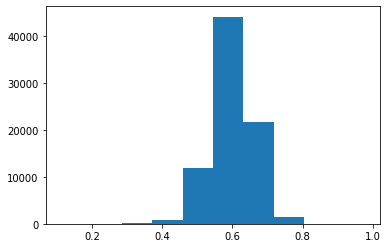

In [183]:
plt.hist(sample_exagg_preds.numpy())

In [184]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0131)

#### Medium

In [185]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [186]:
q_los

[0.075,
 0.075,
 0.075,
 0.7829666902316295,
 0.7829666902316295,
 0.7829666902316295]

In [187]:
q_his

[0.2, 0.2, 0.2, 0.7962219819520104, 0.7963504826069203, 0.7964612934677049]

In [188]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [189]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [190]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [191]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [192]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [193]:
sample_exagg_preds.numpy()

array([[0.63309014],
       [0.65939814],
       [0.6360854 ],
       ...,
       [0.60503024],
       [0.6281538 ],
       [0.7188511 ]], dtype=float32)

In [194]:
torch.mean(sample_exagg_preds)

tensor(0.6043)

(array([2.0000e+00, 3.0000e+00, 6.4000e+01, 7.9200e+02, 1.0650e+04,
        4.3267e+04, 2.3639e+04, 1.5730e+03, 6.7000e+01, 1.0000e+01]),
 array([0.11061842, 0.19745351, 0.28428861, 0.3711237 , 0.4579588 ,
        0.5447939 , 0.631629  , 0.7184641 , 0.80529916, 0.89213425,
        0.97896934], dtype=float32),
 <BarContainer object of 10 artists>)

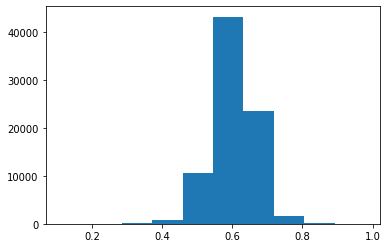

In [195]:
plt.hist(sample_exagg_preds.numpy())

In [196]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0161)

#### High

In [197]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [198]:
q_los

[0.05, 0.05, 0.05, 0.7819938664458573, 0.7819934821550388, 0.7819934821550388]

In [199]:
q_his

[0.225,
 0.225,
 0.225,
 0.798943735185262,
 0.7989938674839251,
 0.7991816932682196]

In [200]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [201]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [202]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [203]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [204]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [205]:
sample_exagg_preds.numpy()

array([[0.6382123 ],
       [0.660953  ],
       [0.6417361 ],
       ...,
       [0.610868  ],
       [0.63385653],
       [0.71920526]], dtype=float32)

In [206]:
torch.mean(sample_exagg_preds)

tensor(0.6084)

(array([2.0000e+00, 3.0000e+00, 4.9000e+01, 7.1800e+02, 9.6160e+03,
        4.2252e+04, 2.5642e+04, 1.7020e+03, 7.3000e+01, 1.0000e+01]),
 array([0.11039653, 0.19731279, 0.28422904, 0.3711453 , 0.45806155,
        0.5449778 , 0.63189405, 0.7188103 , 0.8057265 , 0.8926428 ,
        0.97955906], dtype=float32),
 <BarContainer object of 10 artists>)

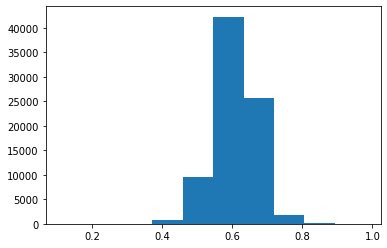

In [207]:
plt.hist(sample_exagg_preds.numpy())

In [208]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0195)

### Runners

In [209]:
columns_horse1 = [
    'horse1_jockey_prev_1_position_runners',
    'horse1_jockey_prev_2_position_runners',
    'horse1_jockey_prev_3_position_runners',
    'horse1_jockey_prev_1_finishing_time_ratio_runners',
    'horse1_jockey_prev_2_finishing_time_ratio_runners',
    'horse1_jockey_prev_3_finishing_time_ratio_runners',
]

In [210]:
columns_horse2 = [
    'horse2_jockey_prev_1_position_runners',
    'horse2_jockey_prev_2_position_runners',
    'horse2_jockey_prev_3_position_runners',
    'horse2_jockey_prev_1_finishing_time_ratio_runners',
    'horse2_jockey_prev_2_finishing_time_ratio_runners',
    'horse2_jockey_prev_3_finishing_time_ratio_runners',
]

#### Small

In [211]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [212]:
q_los

[0.1, 0.1, 0.1, 0.8044131405454777, 0.8043943293389128, 0.7847753633906748]

In [213]:
q_his

[0.2, 0.2, 0.2, 0.8132654348901037, 0.8131682331294443, 0.7934621622399722]

In [214]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [215]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [216]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [217]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [218]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [219]:
sample_exagg_preds.numpy()

array([[0.61954683],
       [0.6706704 ],
       [0.6256185 ],
       ...,
       [0.57318217],
       [0.56683534],
       [0.6900862 ]], dtype=float32)

In [220]:
torch.mean(sample_exagg_preds)

tensor(0.5941)

(array([2.0000e+00, 2.4000e+01, 2.3400e+02, 1.3880e+03, 1.5743e+04,
        4.3033e+04, 1.8523e+04, 1.0900e+03, 2.1000e+01, 9.0000e+00]),
 array([0.12310015, 0.20845515, 0.29381016, 0.37916514, 0.46452013,
        0.54987514, 0.6352301 , 0.7205851 , 0.80594015, 0.89129514,
        0.9766501 ], dtype=float32),
 <BarContainer object of 10 artists>)

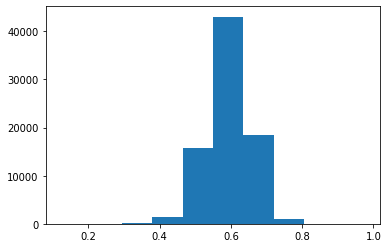

In [221]:
plt.hist(sample_exagg_preds.numpy())

In [222]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0194)

#### Medium

In [223]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [224]:
q_los

[0.075,
 0.075,
 0.075,
 0.8027634010029951,
 0.8026853647620468,
 0.7831080800099801]

In [225]:
q_his

[0.225,
 0.225,
 0.225,
 0.8168879606146501,
 0.8168879606146501,
 0.7970397486714913]

In [226]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [227]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [228]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [229]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [230]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [231]:
sample_exagg_preds.numpy()

array([[0.6231307],
       [0.6722863],
       [0.6251017],
       ...,
       [0.5726427],
       [0.5662938],
       [0.6859697]], dtype=float32)

In [232]:
torch.mean(sample_exagg_preds)

tensor(0.5954)

(array([2.0000e+00, 2.6000e+01, 2.3200e+02, 1.3760e+03, 1.5805e+04,
        4.1830e+04, 1.9608e+04, 1.1560e+03, 2.3000e+01, 9.0000e+00]),
 array([0.12333179, 0.2086666 , 0.2940014 , 0.3793362 , 0.464671  ,
        0.5500058 , 0.6353406 , 0.7206754 , 0.8060102 , 0.891345  ,
        0.9766798 ], dtype=float32),
 <BarContainer object of 10 artists>)

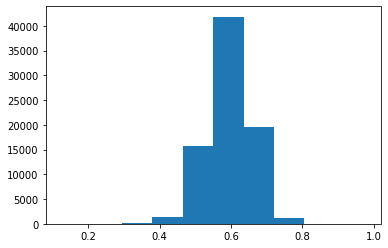

In [233]:
plt.hist(sample_exagg_preds.numpy())

In [234]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0206)

#### High

In [235]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [236]:
q_los

[0.075, 0.075, 0.075, 0.8017554328907454, 0.801754557017755, 0.782199974421551]

In [237]:
q_his

[0.25, 0.25, 0.25, 0.8196213060580584, 0.8199207540573593, 0.7999211612291369]

In [238]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [239]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [240]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [241]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [242]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [243]:
sample_exagg_preds.numpy()

array([[0.6244359 ],
       [0.67792845],
       [0.62668675],
       ...,
       [0.5742987 ],
       [0.56795645],
       [0.6869779 ]], dtype=float32)

In [244]:
torch.mean(sample_exagg_preds)

tensor(0.5994)

(array([2.0000e+00, 2.2000e+01, 2.2300e+02, 1.2760e+03, 1.5077e+04,
        4.0755e+04, 2.1358e+04, 1.3230e+03, 2.2000e+01, 9.0000e+00]),
 array([0.12491512, 0.2100997 , 0.29528427, 0.38046885, 0.46565342,
        0.550838  , 0.63602257, 0.72120714, 0.8063917 , 0.8915763 ,
        0.97676086], dtype=float32),
 <BarContainer object of 10 artists>)

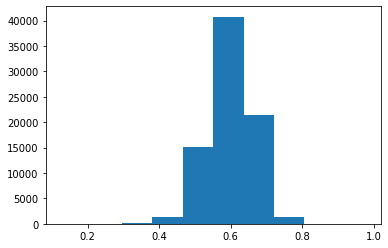

In [245]:
plt.hist(sample_exagg_preds.numpy())

In [246]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0222)

### Month Races

In [247]:
columns_horse1 = [
    'horse1_jockey_prev_1_position_month',
    'horse1_jockey_prev_2_position_month',
    'horse1_jockey_prev_3_position_month',
    'horse1_jockey_prev_1_finishing_time_ratio_month',
    'horse1_jockey_prev_2_finishing_time_ratio_month',
    'horse1_jockey_prev_3_finishing_time_ratio_month',
]

In [248]:
columns_horse2 = [
    'horse2_jockey_prev_1_position_month',
    'horse2_jockey_prev_2_position_month',
    'horse2_jockey_prev_3_position_month',
    'horse2_jockey_prev_1_finishing_time_ratio_month',
    'horse2_jockey_prev_2_finishing_time_ratio_month',
    'horse2_jockey_prev_3_finishing_time_ratio_month',
]

#### Small

In [249]:
q_los = [X_train_sample_eq[column].quantile(q=1/3) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=2/3) for column in columns_horse1]

In [250]:
q_los

[0.1, 0.1, 0.1, 0.7846141171896565, 0.7846208144331395, 0.8042290520687826]

In [251]:
q_his

[0.175,
 0.175,
 0.175,
 0.7930934861844718,
 0.7931210070975826,
 0.8130474627565484]

In [252]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [253]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [254]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [255]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [256]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [257]:
sample_exagg_preds.numpy()

array([[0.6121405 ],
       [0.6804441 ],
       [0.6195792 ],
       ...,
       [0.58791083],
       [0.6003313 ],
       [0.73700565]], dtype=float32)

In [258]:
torch.mean(sample_exagg_preds)

tensor(0.6018)

(array([4.0000e+00, 3.4000e+01, 2.2000e+02, 1.1600e+03, 1.3574e+04,
        4.0535e+04, 2.2137e+04, 2.3210e+03, 7.3000e+01, 9.0000e+00]),
 array([0.1162011 , 0.2024658 , 0.28873053, 0.37499523, 0.46125993,
        0.54752463, 0.63378936, 0.7200541 , 0.8063188 , 0.8925835 ,
        0.9788482 ], dtype=float32),
 <BarContainer object of 10 artists>)

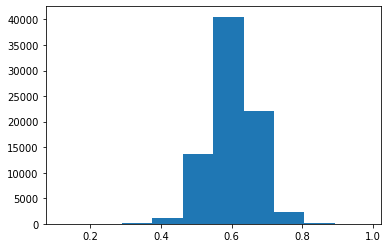

In [259]:
plt.hist(sample_exagg_preds.numpy())

In [260]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0155)

#### Medium

In [261]:
q_los = [X_train_sample_eq[column].quantile(q=1/4) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=3/4) for column in columns_horse1]

In [262]:
q_los

[0.075,
 0.075,
 0.075,
 0.7829666902316295,
 0.7829927883831421,
 0.8025404403145713]

In [263]:
q_his

[0.2, 0.2, 0.2, 0.7964694140641242, 0.7966756331208951, 0.8167505120709286]

In [264]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [265]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [266]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [267]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [268]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [269]:
sample_exagg_preds.numpy()

array([[0.62176895],
       [0.691687  ],
       [0.62226963],
       ...,
       [0.59067756],
       [0.603071  ],
       [0.74463534]], dtype=float32)

In [270]:
torch.mean(sample_exagg_preds)

tensor(0.6094)

(array([4.0000e+00, 3.0000e+01, 2.1700e+02, 1.0210e+03, 1.2362e+04,
        3.8651e+04, 2.4621e+04, 3.0650e+03, 8.7000e+01, 9.0000e+00]),
 array([0.1202896 , 0.20612569, 0.29196176, 0.37779784, 0.46363395,
        0.54947   , 0.6353061 , 0.7211422 , 0.8069783 , 0.89281434,
        0.97865045], dtype=float32),
 <BarContainer object of 10 artists>)

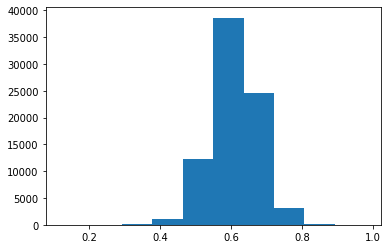

In [271]:
plt.hist(sample_exagg_preds.numpy())

In [272]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0214)

#### High

In [273]:
q_los = [X_train_sample_eq[column].quantile(q=1/5) for column in columns_horse1]
q_his = [X_train_sample_eq[column].quantile(q=4/5) for column in columns_horse1]

In [274]:
q_los

[0.05, 0.05, 0.05, 0.782023198885685, 0.782023198885685, 0.8015733621876803]

In [275]:
q_his

[0.225,
 0.225,
 0.225,
 0.7992265147419635,
 0.7994385994094895,
 0.8195411928068946]

In [276]:
X_train_sample_exagg = X_train_sample_eq.copy()
X_train_sample_exagg.shape

(80067, 96)

In [277]:
for column, q_lo in zip(columns_horse1, q_los):
    X_train_sample_exagg[column] = q_lo

In [278]:
for column, q_hi in zip(columns_horse2, q_his):
    X_train_sample_exagg[column] = q_hi

In [279]:
X_train_sample_exagg_tensor = torch.from_numpy(X_train_sample_exagg.to_numpy()).float().to(device)

In [280]:
with torch.no_grad():
    sample_exagg_preds = torch.sigmoid(net.forward(X_train_sample_exagg_tensor))

In [281]:
sample_exagg_preds.numpy()

array([[0.6311974 ],
       [0.7025883 ],
       [0.62487286],
       ...,
       [0.59335583],
       [0.6057225 ],
       [0.75203085]], dtype=float32)

In [282]:
torch.mean(sample_exagg_preds)

tensor(0.6168)

(array([4.0000e+00, 2.9000e+01, 2.0900e+02, 9.3100e+02, 1.1351e+04,
        3.6658e+04, 2.6745e+04, 4.0170e+03, 1.1400e+02, 9.0000e+00]),
 array([0.12448898, 0.20988493, 0.29528087, 0.38067684, 0.4660728 ,
        0.55146873, 0.6368647 , 0.72226065, 0.8076566 , 0.8930526 ,
        0.9784485 ], dtype=float32),
 <BarContainer object of 10 artists>)

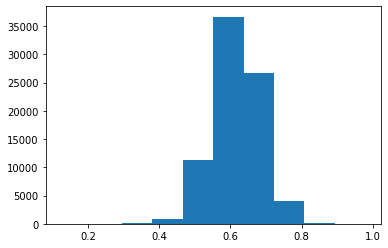

In [283]:
plt.hist(sample_exagg_preds.numpy())

In [284]:
torch.mean(abs(sample_exagg_preds - eq_preds))

tensor(0.0280)

---